In [8]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [19]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
#!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV, TunedThresholdClassifierCV, FixedThresholdClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


from sklearn.pipeline import Pipeline

import pandas as pd
import seaborn as sns

### Область работы 2 (поиск  модели .... )

In [11]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = ... # содержит только имя файла, без имен папок !!!

In [12]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [13]:
train.head()

,name,diameter,weight,red,green,blue
0,grapefruit,11.60,199.71,153,59,16
1,grapefruit,10.25,178.06,148,54,14
2,grapefruit,11.99,205.39,133,72,2
3,orange,7.63,139.91,152,82,2
4,orange,7.43,137.10,158,78,3


In [14]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('name', axis=1), train.name,  test_size=0.25)

In [15]:
pipeline = Pipeline([
    ('preprocessing', StandardScaler()),
    ('model', SVC())
     ])

In [16]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing', StandardScaler()), ('model', SVC())])

In [17]:
pipeline.score(X_test, y_test)

0.9381333333333334

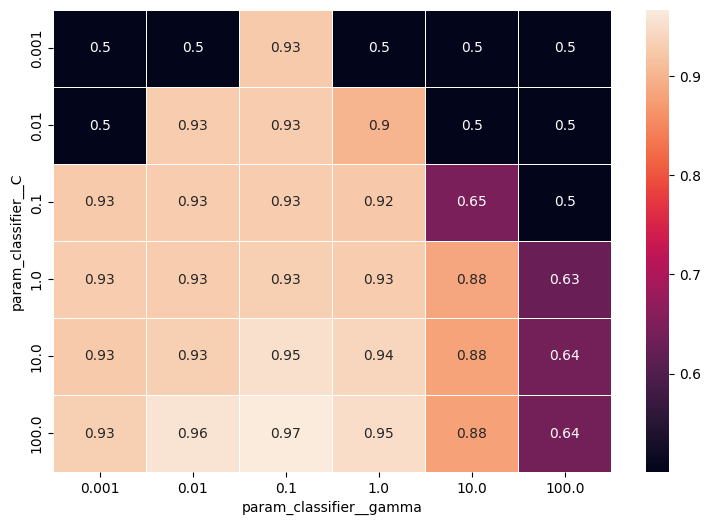

In [23]:
pipeline = Pipeline([
    ('preprocessing', StandardScaler()),
    ('classifier', SVC())
     ])
C = [0.001, 0.01, 0.1, 1, 10, 100]
gamma=[0.001, 0.01, 0.1, 1, 10, 100]


param_grid =[
    {'preprocessing': [StandardScaler()], 
     'classifier': [SVC()],
     'classifier__C': C,
     'classifier__gamma': gamma
     }
]

grid = GridSearchCV(pipeline, param_grid, cv=5, return_train_score=True)
grid.fit(X_train, y_train)
table=pd.DataFrame(grid.cv_results_)
pv_table=table.pivot_table(index='param_classifier__C',columns='param_classifier__gamma',values='mean_test_score')
pv_table
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pv_table, annot=True, linewidths=.5, ax=ax);


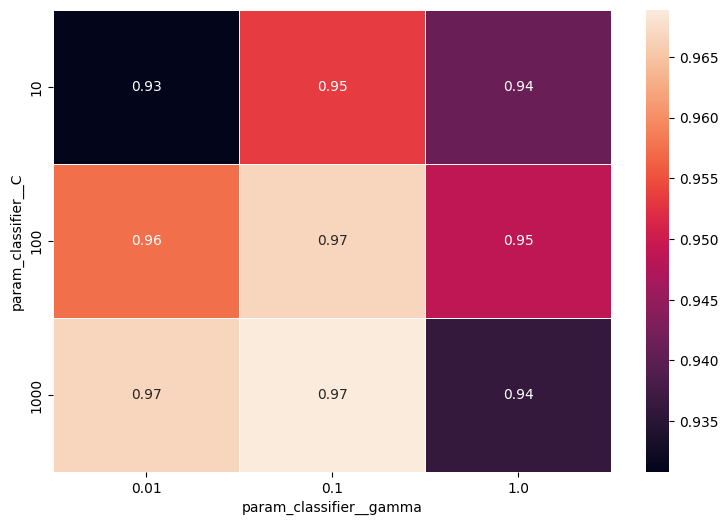

In [24]:
pipeline = Pipeline([
    ('preprocessing', StandardScaler()),
    ('classifier', SVC())
     ])
C = [10, 100, 1000]
gamma=[0.01, 0.1, 1]


param_grid =[
    {'preprocessing': [StandardScaler()], 
     'classifier': [SVC()],
     'classifier__C': C,
     'classifier__gamma': gamma
     }
]

grid = GridSearchCV(pipeline, param_grid, cv=5, return_train_score=True)
grid.fit(X_train, y_train)
table=pd.DataFrame(grid.cv_results_)
pv_table=table.pivot_table(index='param_classifier__C',columns='param_classifier__gamma',values='mean_test_score')
pv_table
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pv_table, annot=True, linewidths=.5, ax=ax);

In [30]:
pipeline = Pipeline([
    ('preprocessing', StandardScaler()),
    ('classifier', SVC(C=1000, gamma=0.1, probability=True))
     ])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing', StandardScaler()),
                ('classifier', SVC(C=1000, gamma=0.1, probability=True))])

In [26]:
import pickle

# # Запись модели
with open('svc-model.pkl', 'wb') as f:
     pickle.dump(pipeline, f)

# Вызов модели
#with open('svc-model.pkl', 'rb') as f:
#    s = pickle.load(f)

In [27]:
with open('svc-model.pkl', 'rb') as f:
    model = pickle.load(f)

In [29]:
model.predict_proba(test)

AttributeError: This 'Pipeline' has no attribute 'predict_proba'

In [31]:
pipeline.predict_proba(test)

array([[3.00000090e-14, 1.00000000e+00],
       [3.87952768e-03, 9.96120472e-01],
       [3.00000090e-14, 1.00000000e+00],
       ...,
       [9.71932492e-01, 2.80675084e-02],
       [2.07544824e-02, 9.79245518e-01],
       [9.18053361e-01, 8.19466389e-02]], shape=(2500, 2))

In [37]:
from sklearn.metrics import RocCurveDisplay, DetCurveDisplay, ConfusionMatrixDisplay, PrecisionRecallDisplay

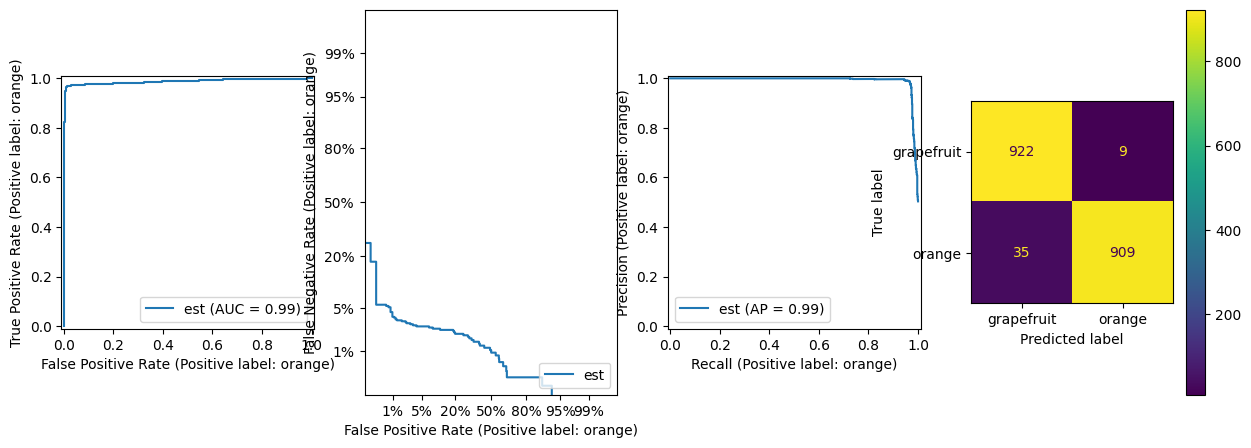

In [40]:
fig, [ax_roc, ax_det, ax_pr, ax_cf] = plt.subplots(1, 4, figsize=(15, 5))
RocCurveDisplay.from_estimator(pipeline, X_test, y_test, ax=ax_roc, name='est');
DetCurveDisplay.from_estimator(pipeline, X_test, y_test, ax=ax_det, name='est');
PrecisionRecallDisplay.from_estimator(pipeline, X_test, y_test, ax=ax_pr, name='est');
ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test, ax=ax_cf);

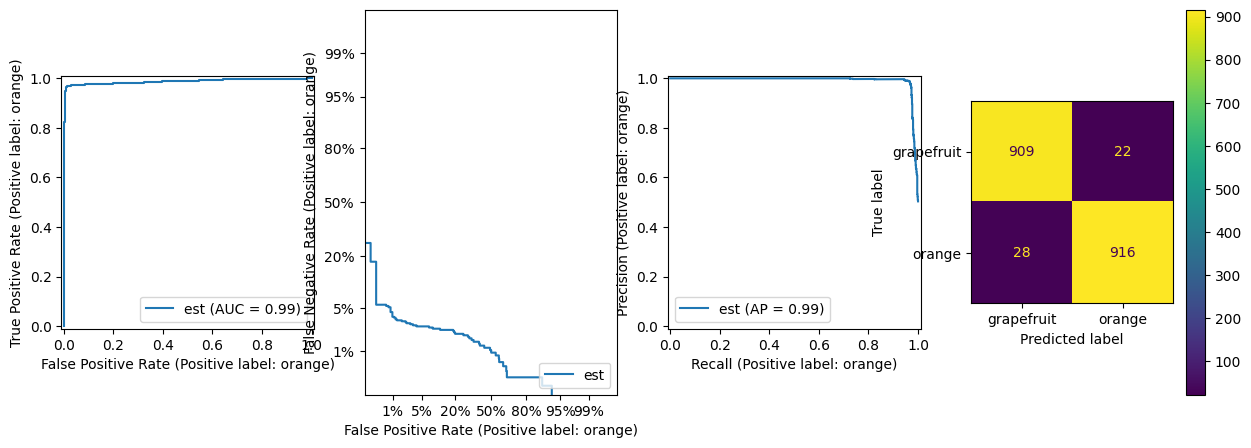

In [48]:
model_final = FixedThresholdClassifier(pipeline, threshold = 0.3).fit(X_train, y_train)
fig, [ax_roc, ax_det, ax_pr, ax_cf] = plt.subplots(1, 4, figsize=(15, 5))
RocCurveDisplay.from_estimator(model_final, X_test, y_test, ax=ax_roc, name='est');
DetCurveDisplay.from_estimator(model_final, X_test, y_test, ax=ax_det, name='est');
PrecisionRecallDisplay.from_estimator(model_final, X_test, y_test, ax=ax_pr, name='est');
ConfusionMatrixDisplay.from_estimator(model_final, X_test, y_test, ax=ax_cf);